In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate,ShuffleSplit
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


In [2]:
df=pd.read_csv('/content/song_data.csv')

In [3]:
df.head()

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370  
2    -7.828           1       0.0792  123.881               4          0.324  
3    -4.938           1       0.1070  122.444               4          0.198  
4    -5.065           1       0.0313  172.011               4          0.574

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [5]:
df.describe()

song_popularity  song_duration_ms  acousticness  danceability  \
count     18835.000000      1.883500e+04  18835.000000  18835.000000   
mean         52.991877      2.182116e+05      0.258539      0.633348   
std          21.905654      5.988754e+04      0.288719      0.156723   
min           0.000000      1.200000e+04      0.000001      0.000000   
25%          40.000000      1.843395e+05      0.024100      0.533000   
50%          56.000000      2.113060e+05      0.132000      0.645000   
75%          69.000000      2.428440e+05      0.424000      0.748000   
max         100.000000      1.799346e+06      0.996000      0.987000   

             energy  instrumentalness           key      liveness  \
count  18835.000000      18835.000000  18835.000000  18835.000000   
mean       0.644995          0.078008      5.289196      0.179650   
std        0.214101          0.221591      3.614595      0.143984   
min        0.001070          0.000000      0.000000      0.010900   
25%        0.510000          0.000000      2.000000      0.092900   
50%        0.674000          0.000011      5.000000      0.122000   
75%        0.815000          0.002570      8.000000      0.221000   
max        0.999000          0.997000     11.000000      0.986000   

           loudness    audio_mode   speechiness         tempo  time_signature  \
count  18835.000000  18835.000000  18835.000000  18835.000000    18835.000000   
mean      -7.447435      0.628139      0.102099    121.073154        3.959119   
std        3.827831      0.483314      0.104378     28.714456        0.298533   
min      -38.768000      0.000000      0.000000      0.000000        0.000000   
25%       -9.044000      0.000000      0.037800     98.368000        4.000000   
50%       -6.555000      1.000000      0.055500    120.013000        4.000000   
75%       -4.908000      1.000000      0.119000    139.931000        4.000000   
max        1.585000      1.000000      0.941000    242.318000        5.000000   

       audio_valence  
count   18835.000000  
mean        0.527967  
std         0.244632  
min         0.000000  
25%         0.335000  
50%         0.527000  
75%         0.725000  
max         0.984000

In [ ]:
df.shape

(18835, 15)

In [ ]:
df.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

In [ ]:
df.isna().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [ ]:
df.describe()

song_popularity  song_duration_ms  acousticness  danceability  \
count     18835.000000      1.883500e+04  18835.000000  18835.000000   
mean         52.991877      2.182116e+05      0.258539      0.633348   
std          21.905654      5.988754e+04      0.288719      0.156723   
min           0.000000      1.200000e+04      0.000001      0.000000   
25%          40.000000      1.843395e+05      0.024100      0.533000   
50%          56.000000      2.113060e+05      0.132000      0.645000   
75%          69.000000      2.428440e+05      0.424000      0.748000   
max         100.000000      1.799346e+06      0.996000      0.987000   

             energy  instrumentalness           key      liveness  \
count  18835.000000      18835.000000  18835.000000  18835.000000   
mean       0.644995          0.078008      5.289196      0.179650   
std        0.214101          0.221591      3.614595      0.143984   
min        0.001070          0.000000      0.000000      0.010900   
25%        0.510000          0.000000      2.000000      0.092900   
50%        0.674000          0.000011      5.000000      0.122000   
75%        0.815000          0.002570      8.000000      0.221000   
max        0.999000          0.997000     11.000000      0.986000   

           loudness    audio_mode   speechiness         tempo  time_signature  \
count  18835.000000  18835.000000  18835.000000  18835.000000    18835.000000   
mean      -7.447435      0.628139      0.102099    121.073154        3.959119   
std        3.827831      0.483314      0.104378     28.714456        0.298533   
min      -38.768000      0.000000      0.000000      0.000000        0.000000   
25%       -9.044000      0.000000      0.037800     98.368000        4.000000   
50%       -6.555000      1.000000      0.055500    120.013000        4.000000   
75%       -4.908000      1.000000      0.119000    139.931000        4.000000   
max        1.585000      1.000000      0.941000    242.318000        5.000000   

       audio_valence  
count   18835.000000  
mean        0.527967  
std         0.244632  
min         0.000000  
25%         0.335000  
50%         0.527000  
75%         0.725000  
max         0.984000

In [6]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

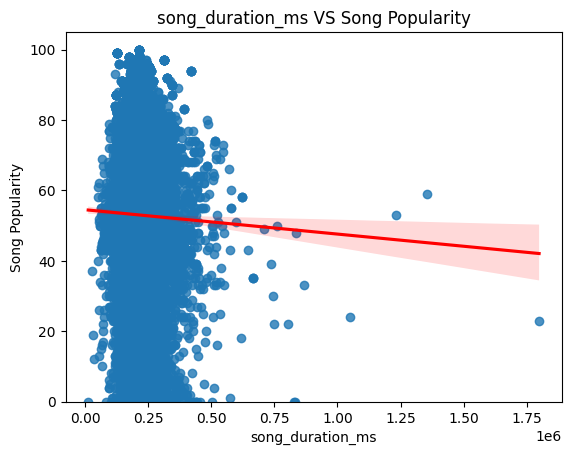

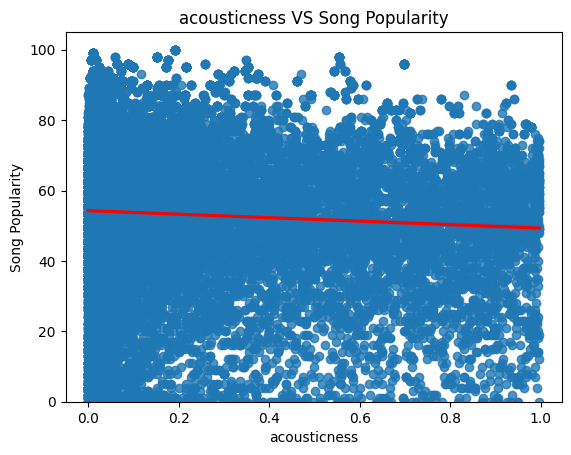

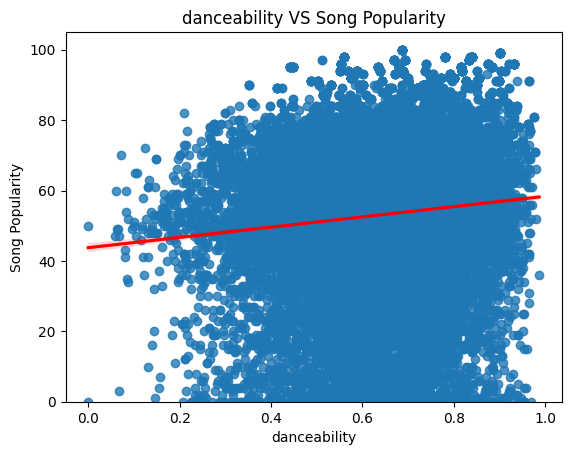

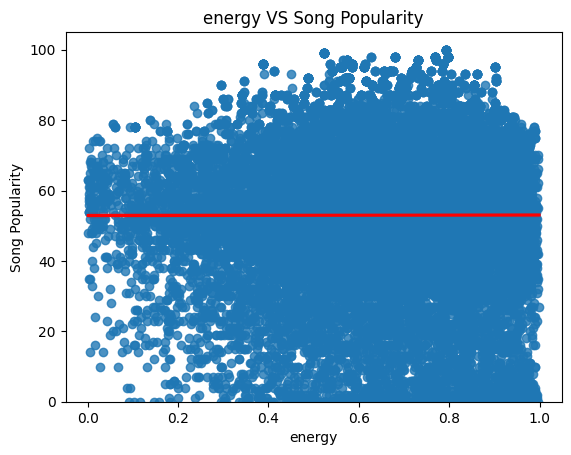

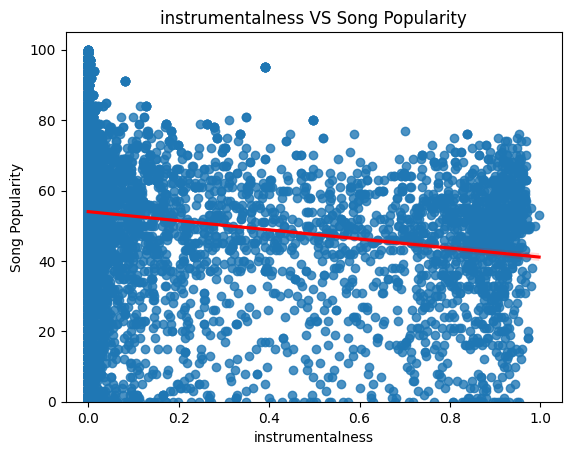

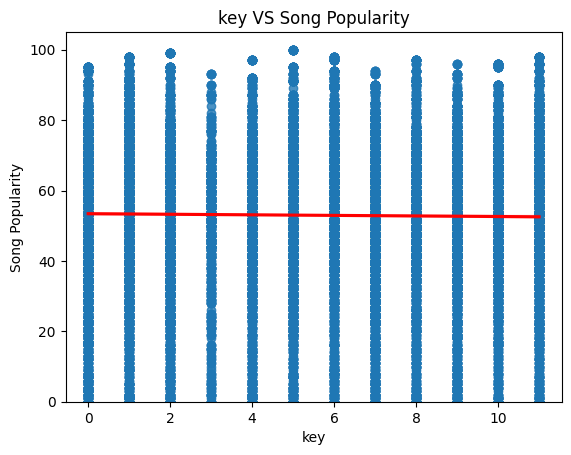

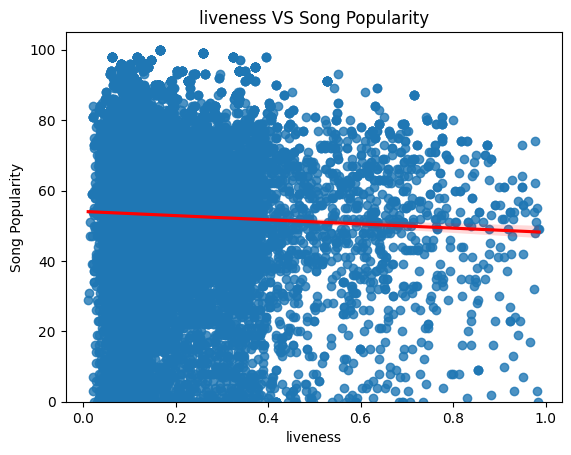

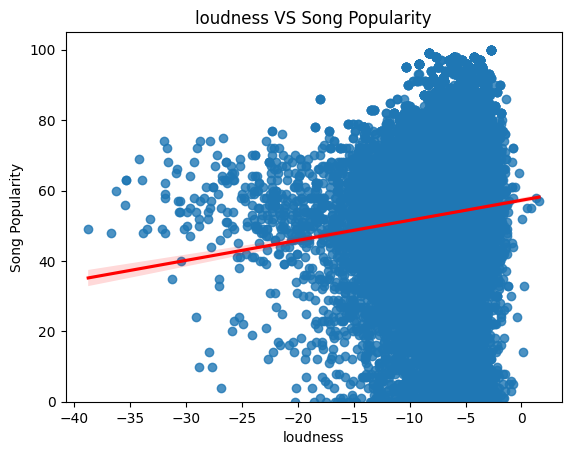

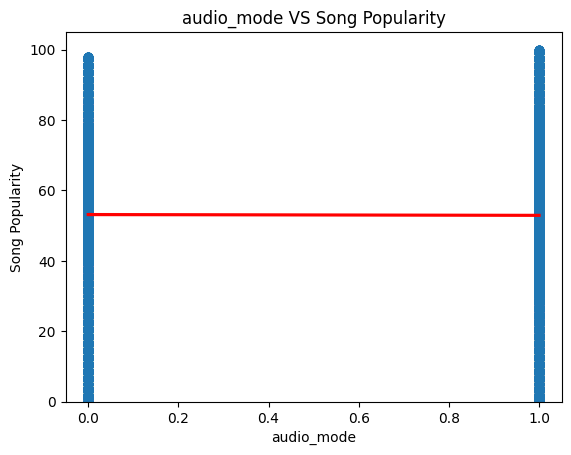

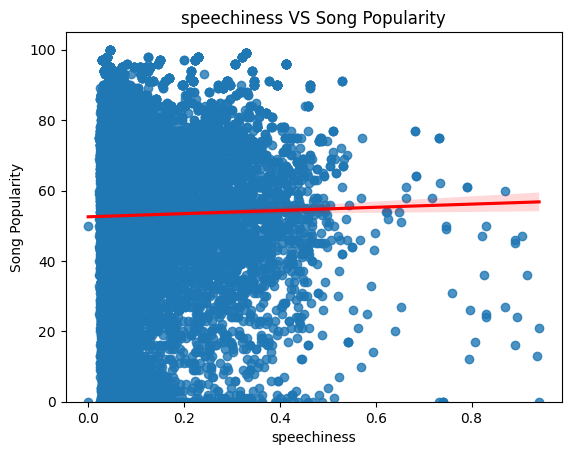

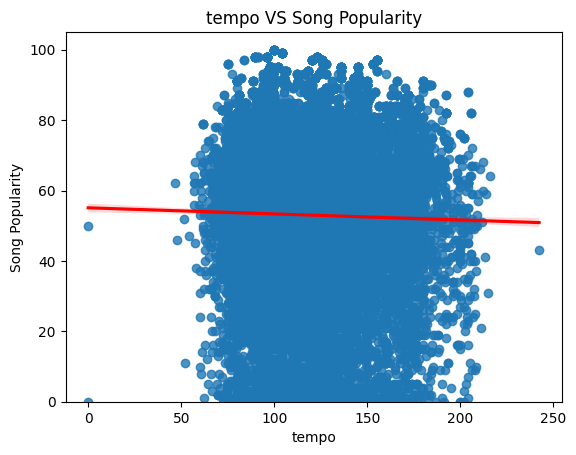

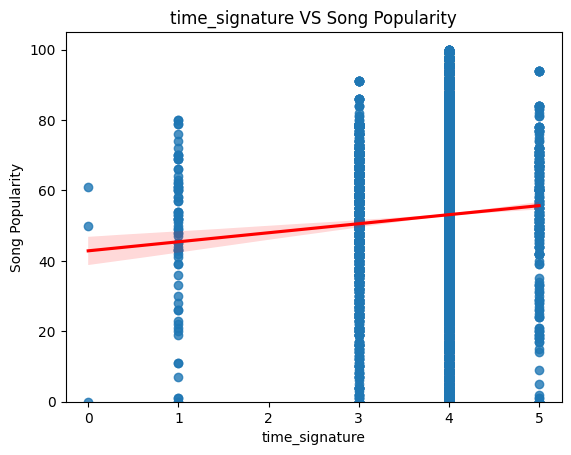

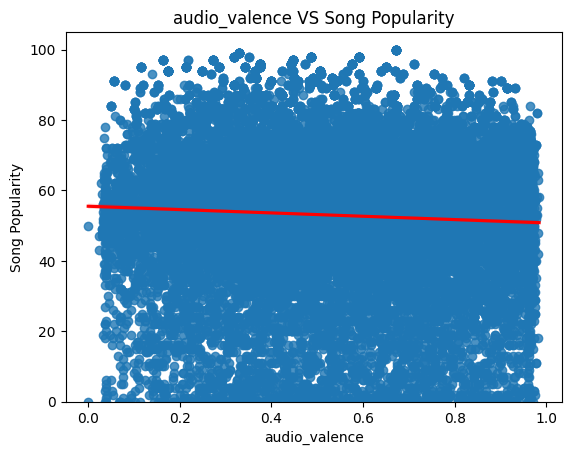

In [ ]:
for col in X.columns:
  if col !="song_popularity" :
    plt.figure()
    sns.regplot(x=df[col].astype(float),y=df["song_popularity"].astype(float),line_kws={'color':'red'})
    plt.xlabel(col)
    plt.ylabel("Song Popularity")
    plt.title(f"{col} VS Song Popularity")
    plt.ylim(0,)
    plt.show()

In [ ]:
numeric_features=df.drop("song_name",axis=1)
correlation=numeric_features.corr()
print(correlation['song_popularity'].sort_values(ascending=False),'/n')

song_popularity     1.000000
danceability        0.104290
loudness            0.099442
time_signature      0.034983
speechiness         0.021479
energy              0.001365
audio_mode         -0.004969
key                -0.013160
song_duration_ms   -0.018899
tempo              -0.022672
liveness           -0.038937
audio_valence      -0.052895
acousticness       -0.065181
instrumentalness   -0.130907
Name: song_popularity, dtype: float64 /n


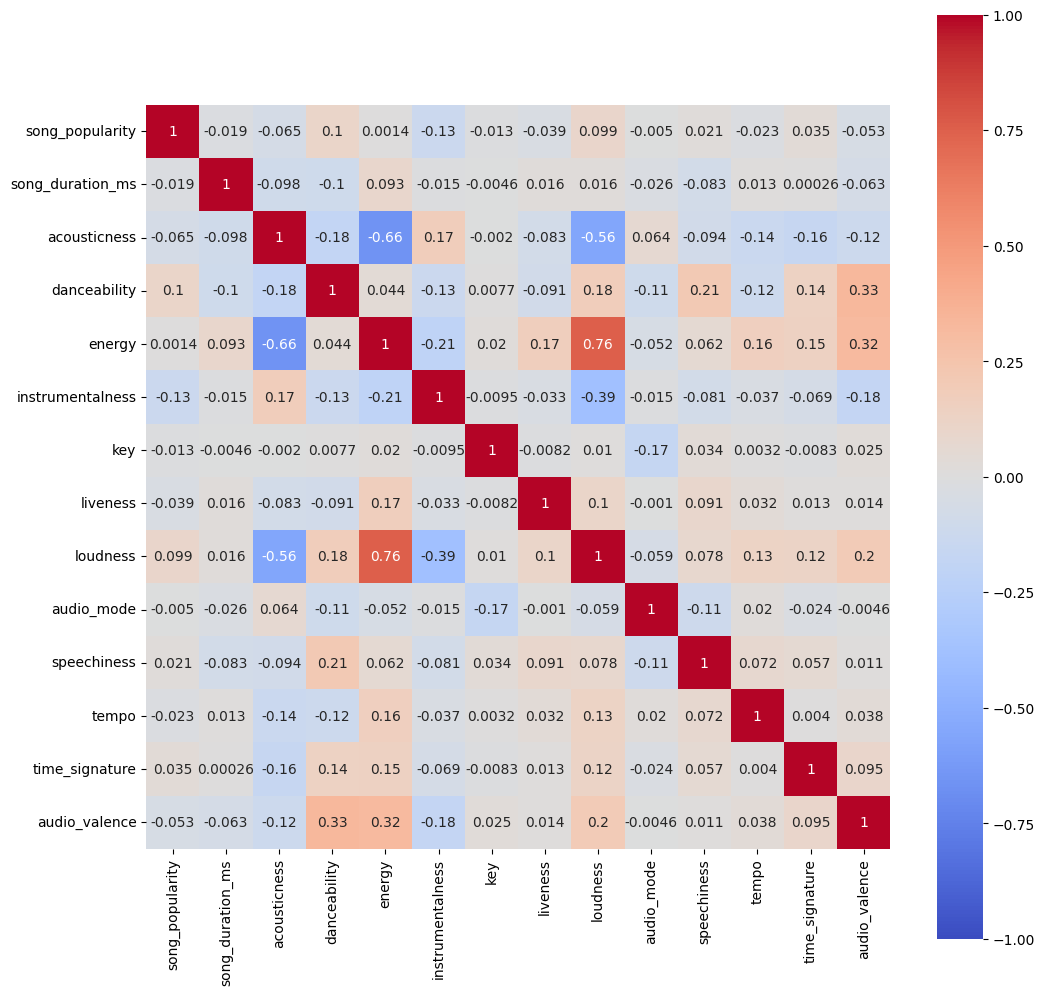

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation,square=True,vmin=-1,vmax=1,annot=True,cmap='coolwarm')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


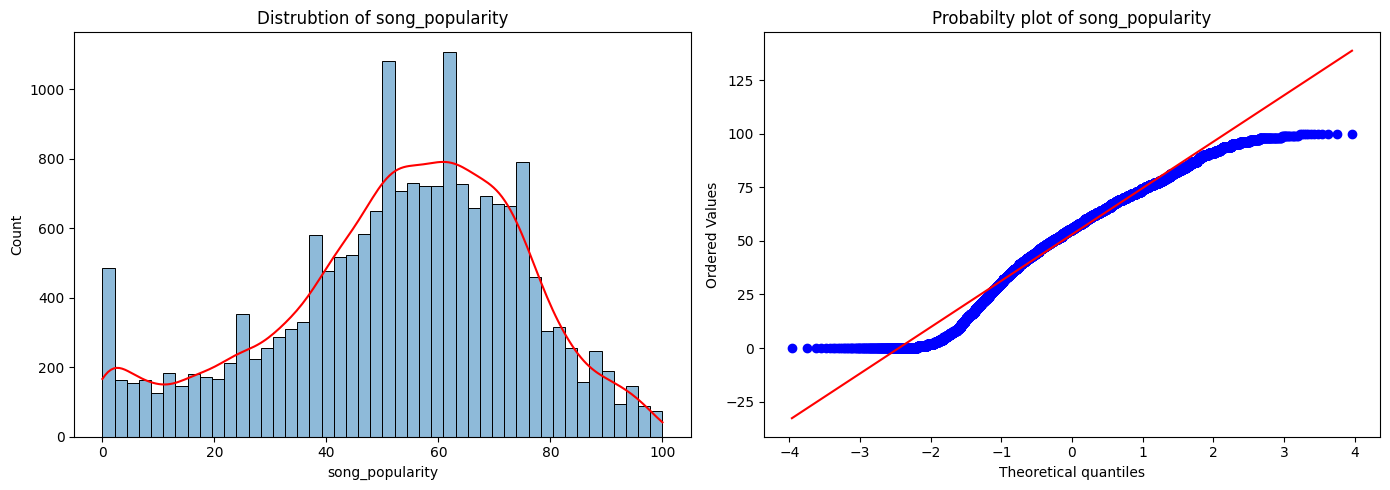

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


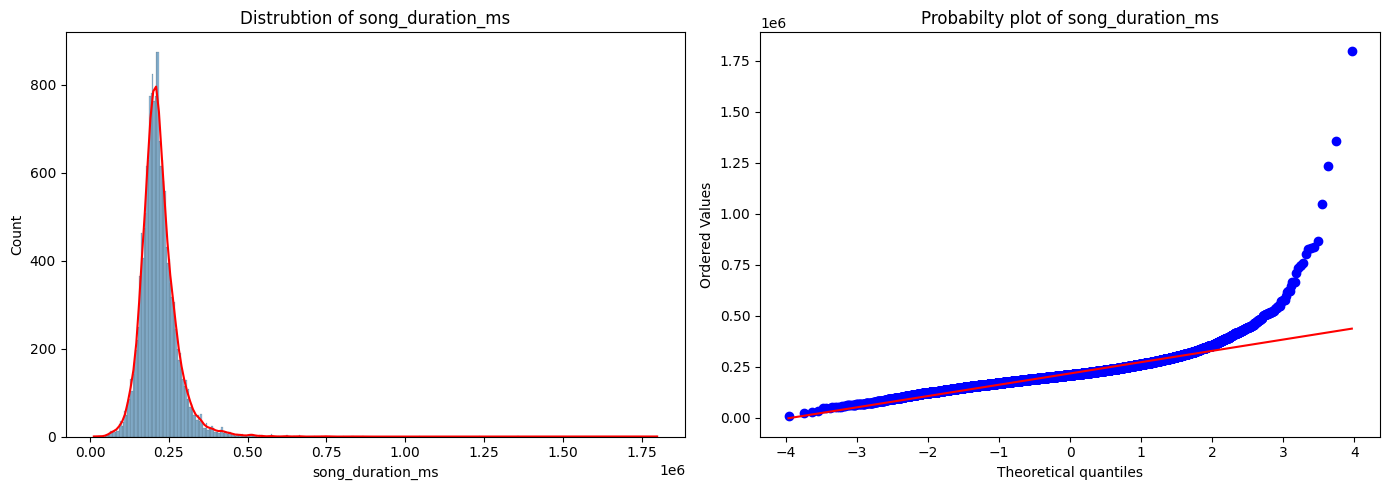

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


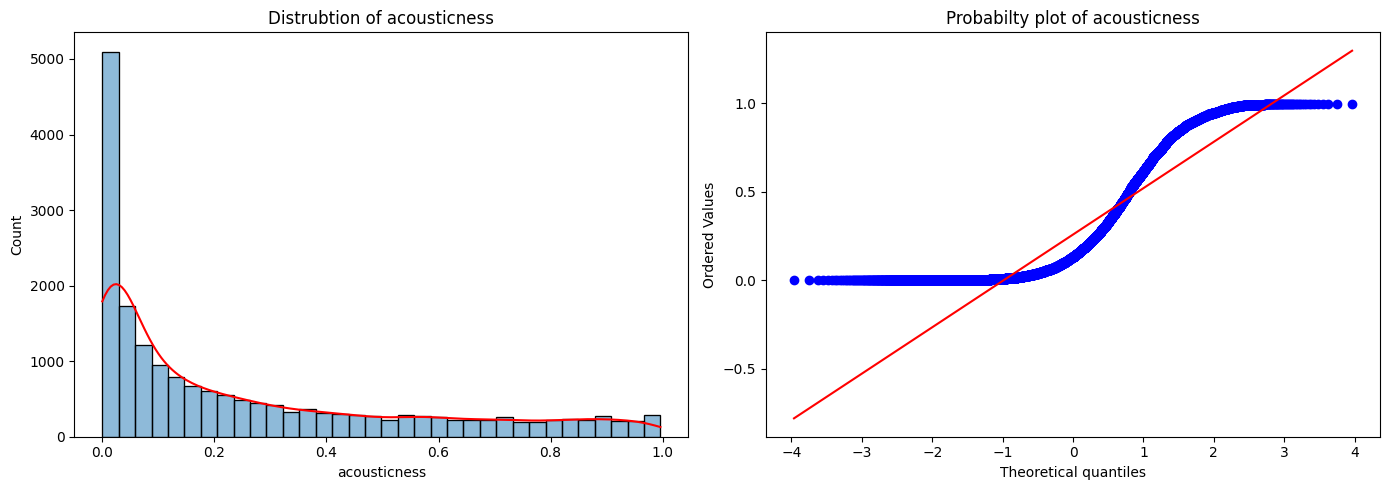

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


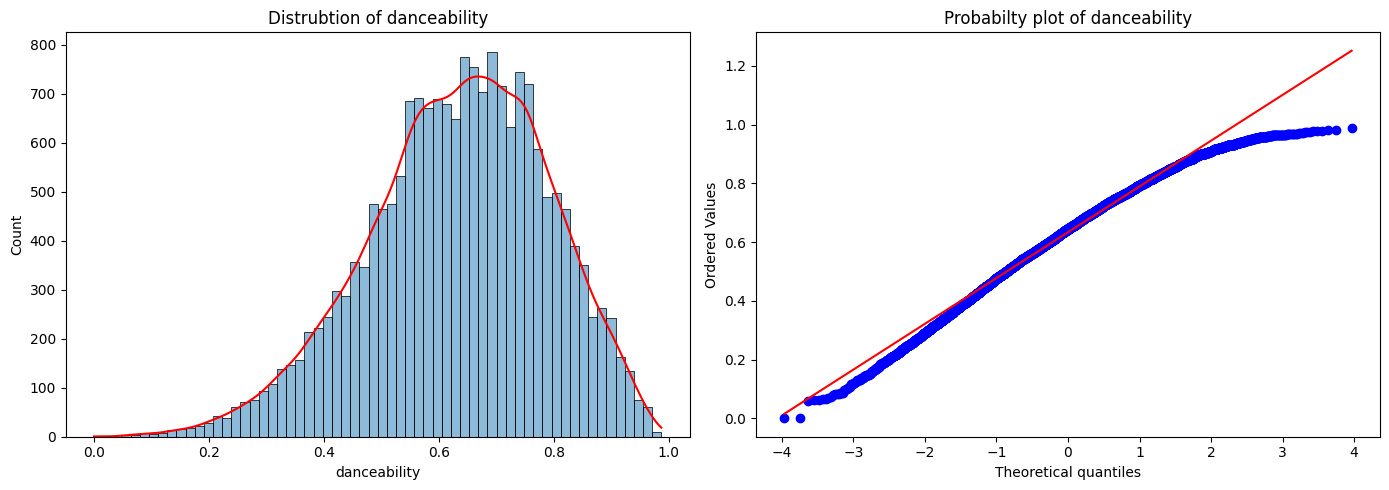

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


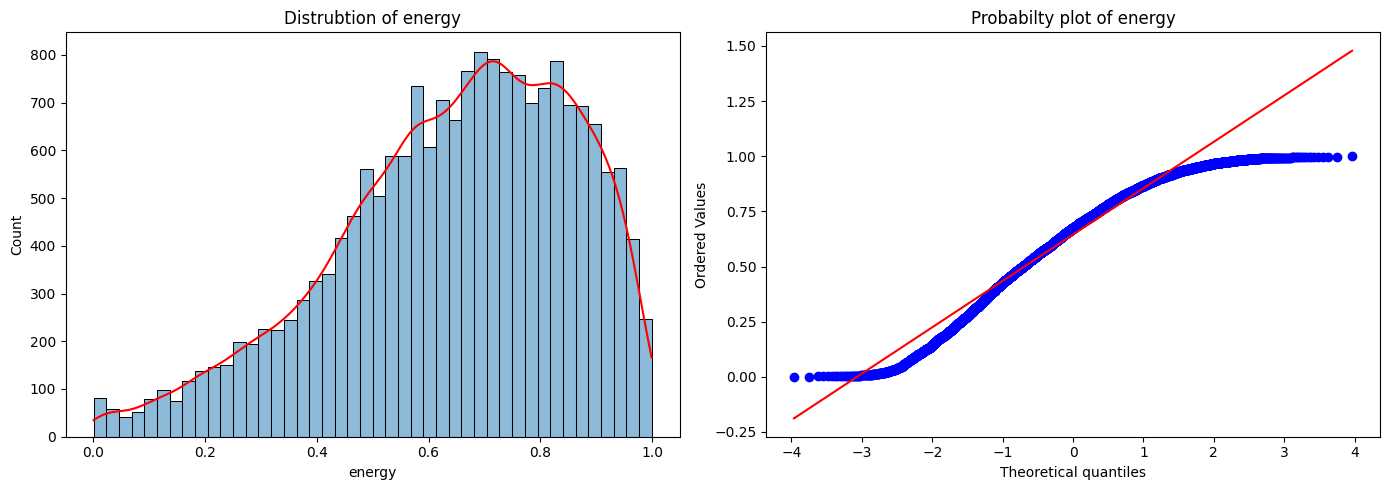

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


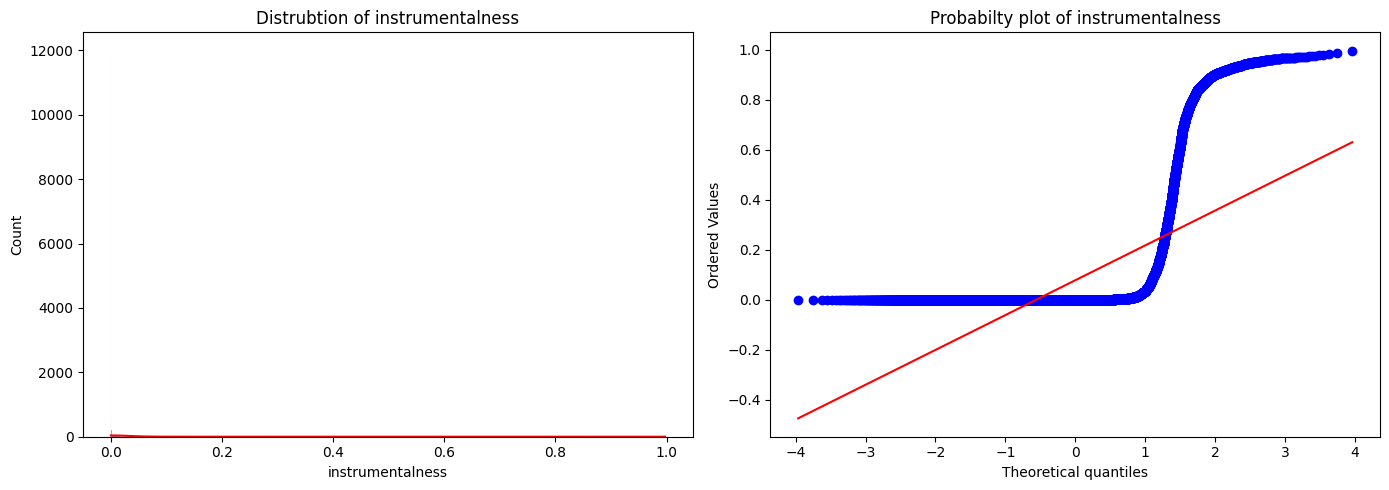

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


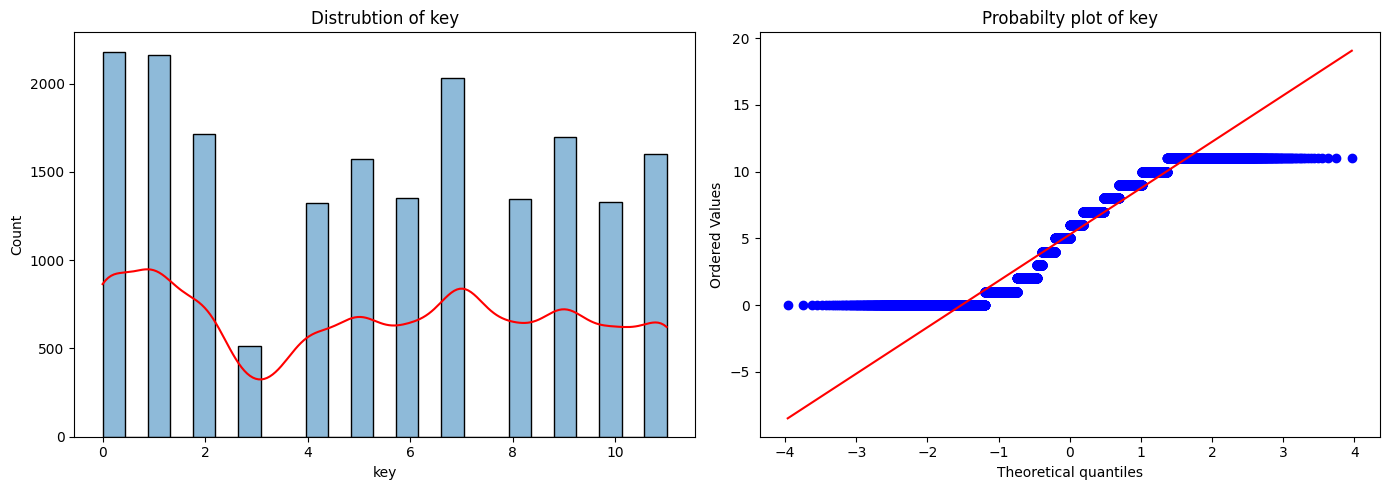

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


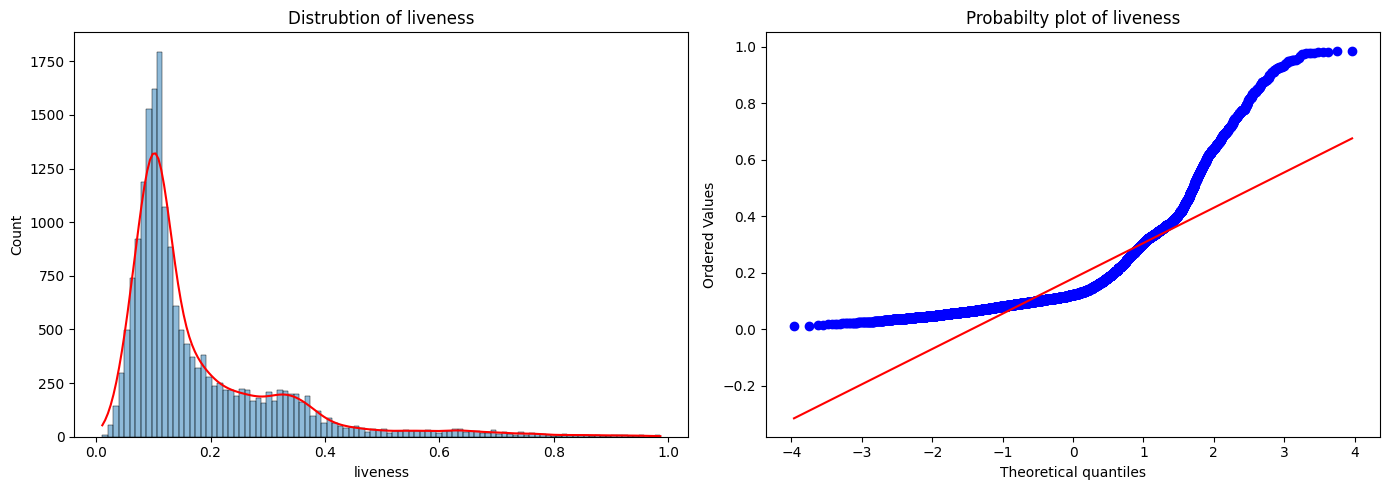

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


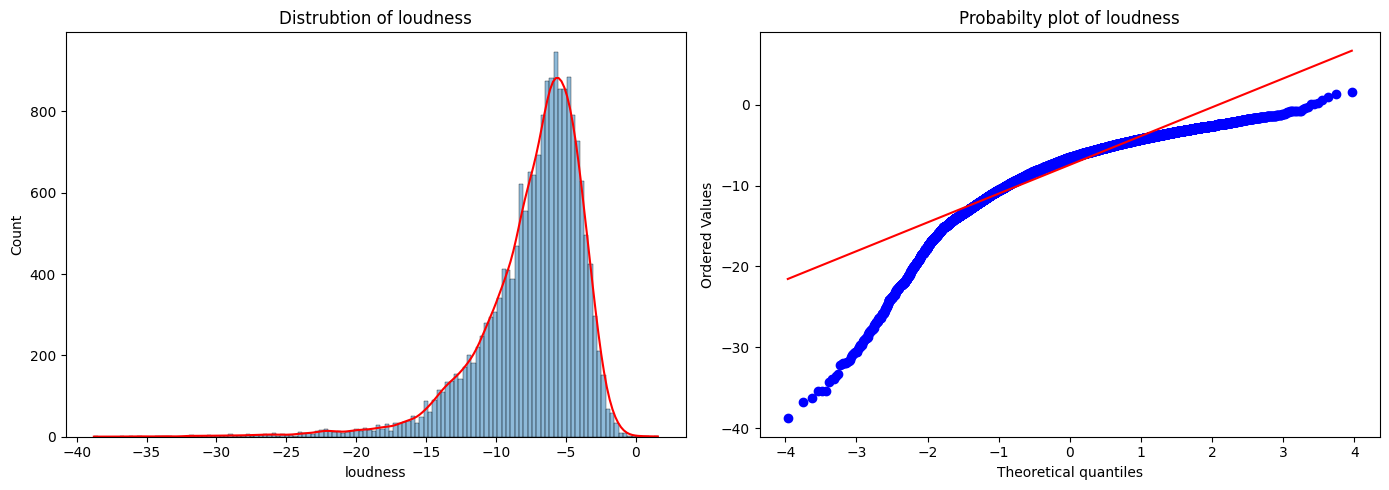

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


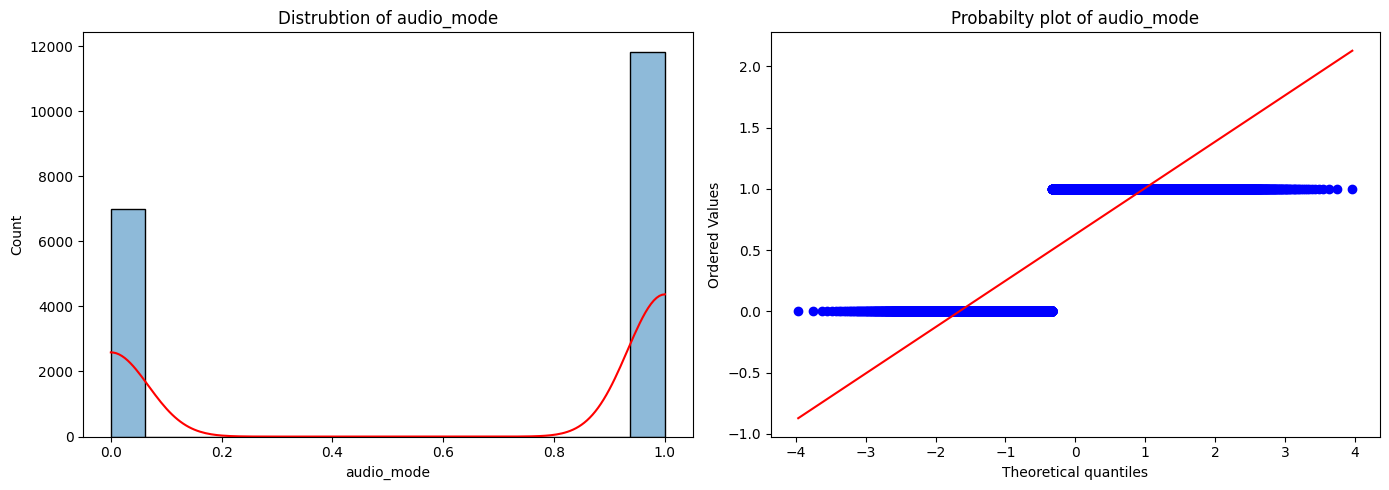

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


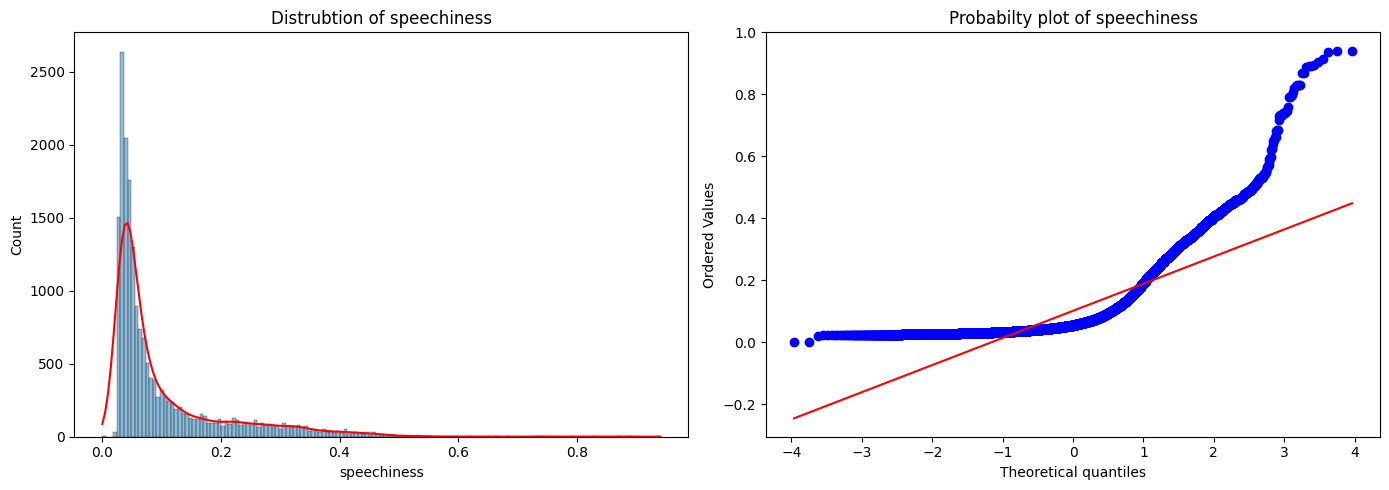

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


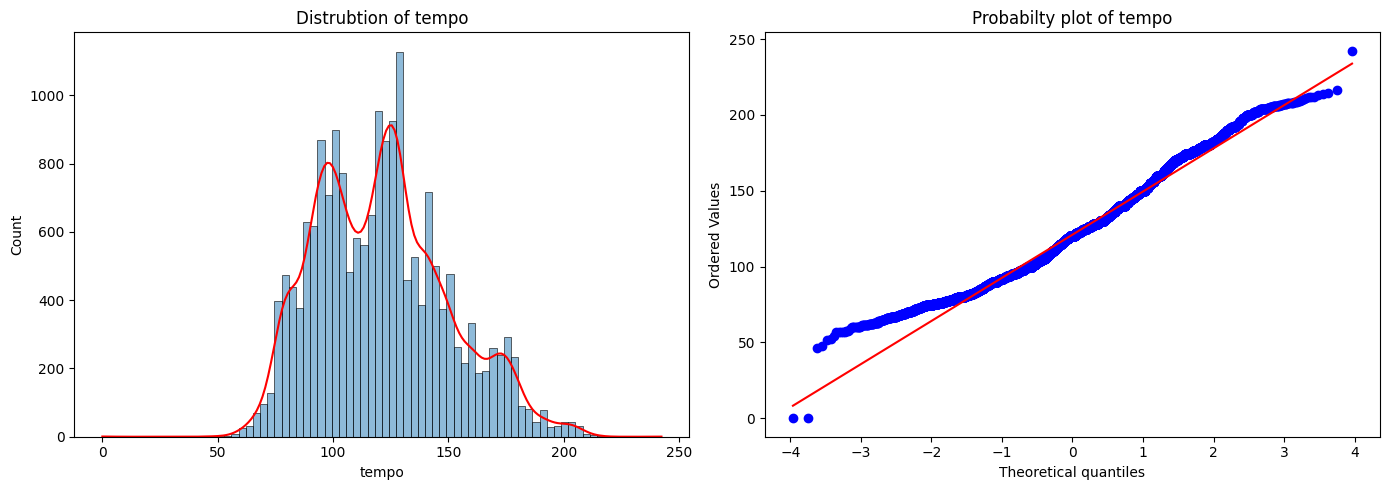

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


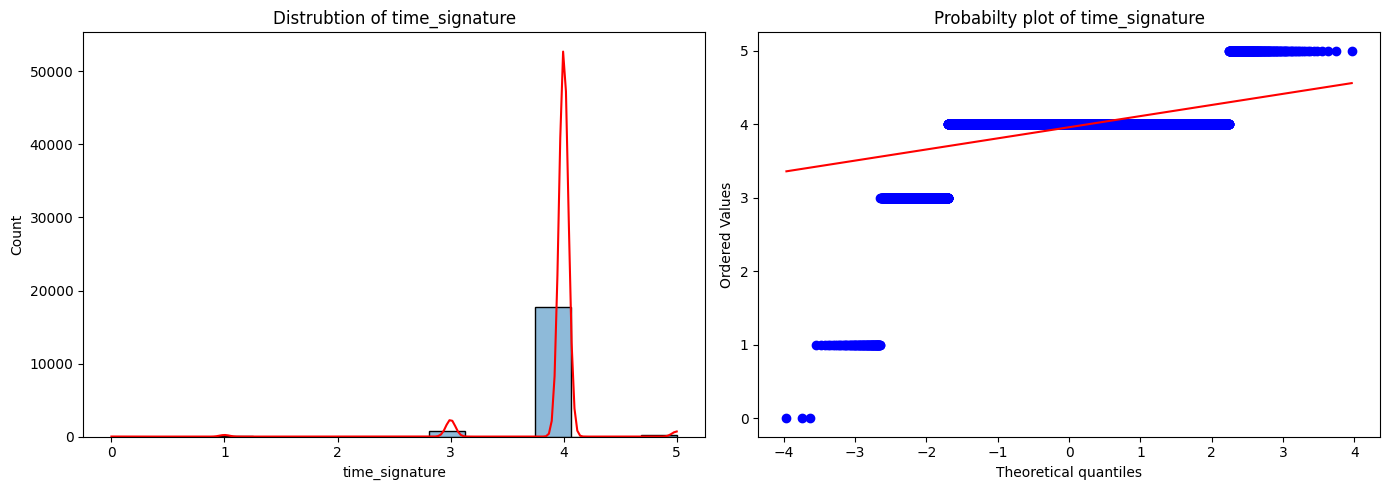

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


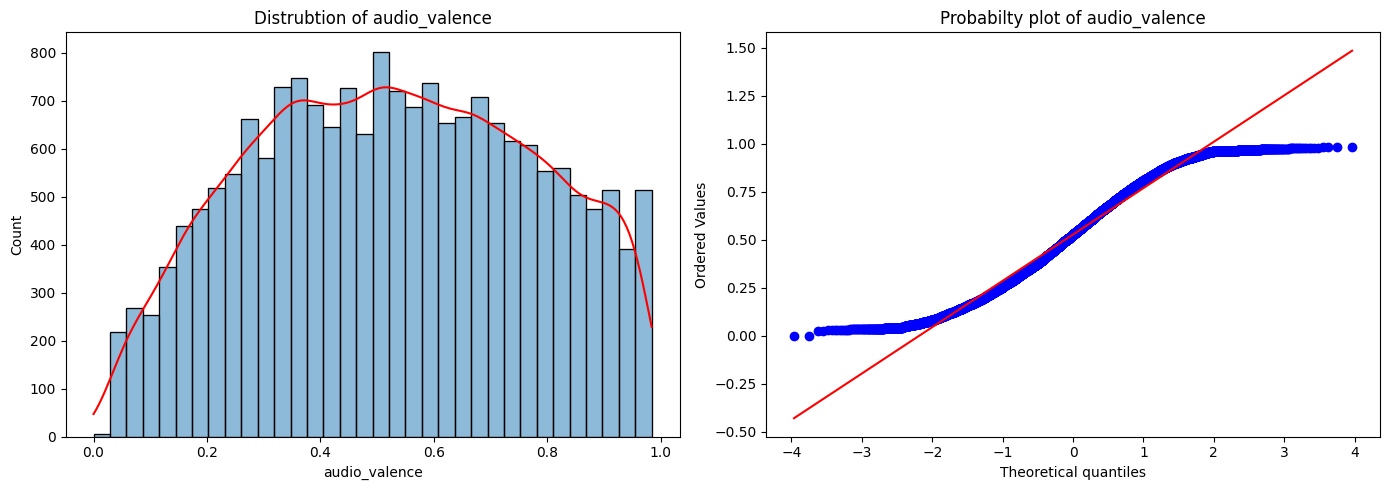

In [ ]:
for col in X.columns:
  plt.figure(figsize=(14,5))
  plt.subplot(1,2,1)
  ax=sns.histplot(X[col],kde=True,)
  ax.lines[0].set_color('red')
  plt.title(f"Distrubtion of {col}")
  plt.subplot(1,2,2)
  stats.probplot(X[col],dist="norm",plot=plt)
  plt.title(f"Probabilty plot of {col}")
  plt.tight_layout()
  plt.show()


In [ ]:
X.skew(axis=0)

song_popularity    -0.501487
song_duration_ms    3.257477
acousticness        1.071164
danceability       -0.391719
energy             -0.620738
instrumentalness    2.985176
key                -0.002520
liveness            2.215423
loudness           -1.929511
audio_mode         -0.530308
speechiness         2.271018
tempo               0.442855
time_signature     -4.979342
audio_valence      -0.016423
dtype: float64

<Figure size 2400x2000 with 0 Axes>

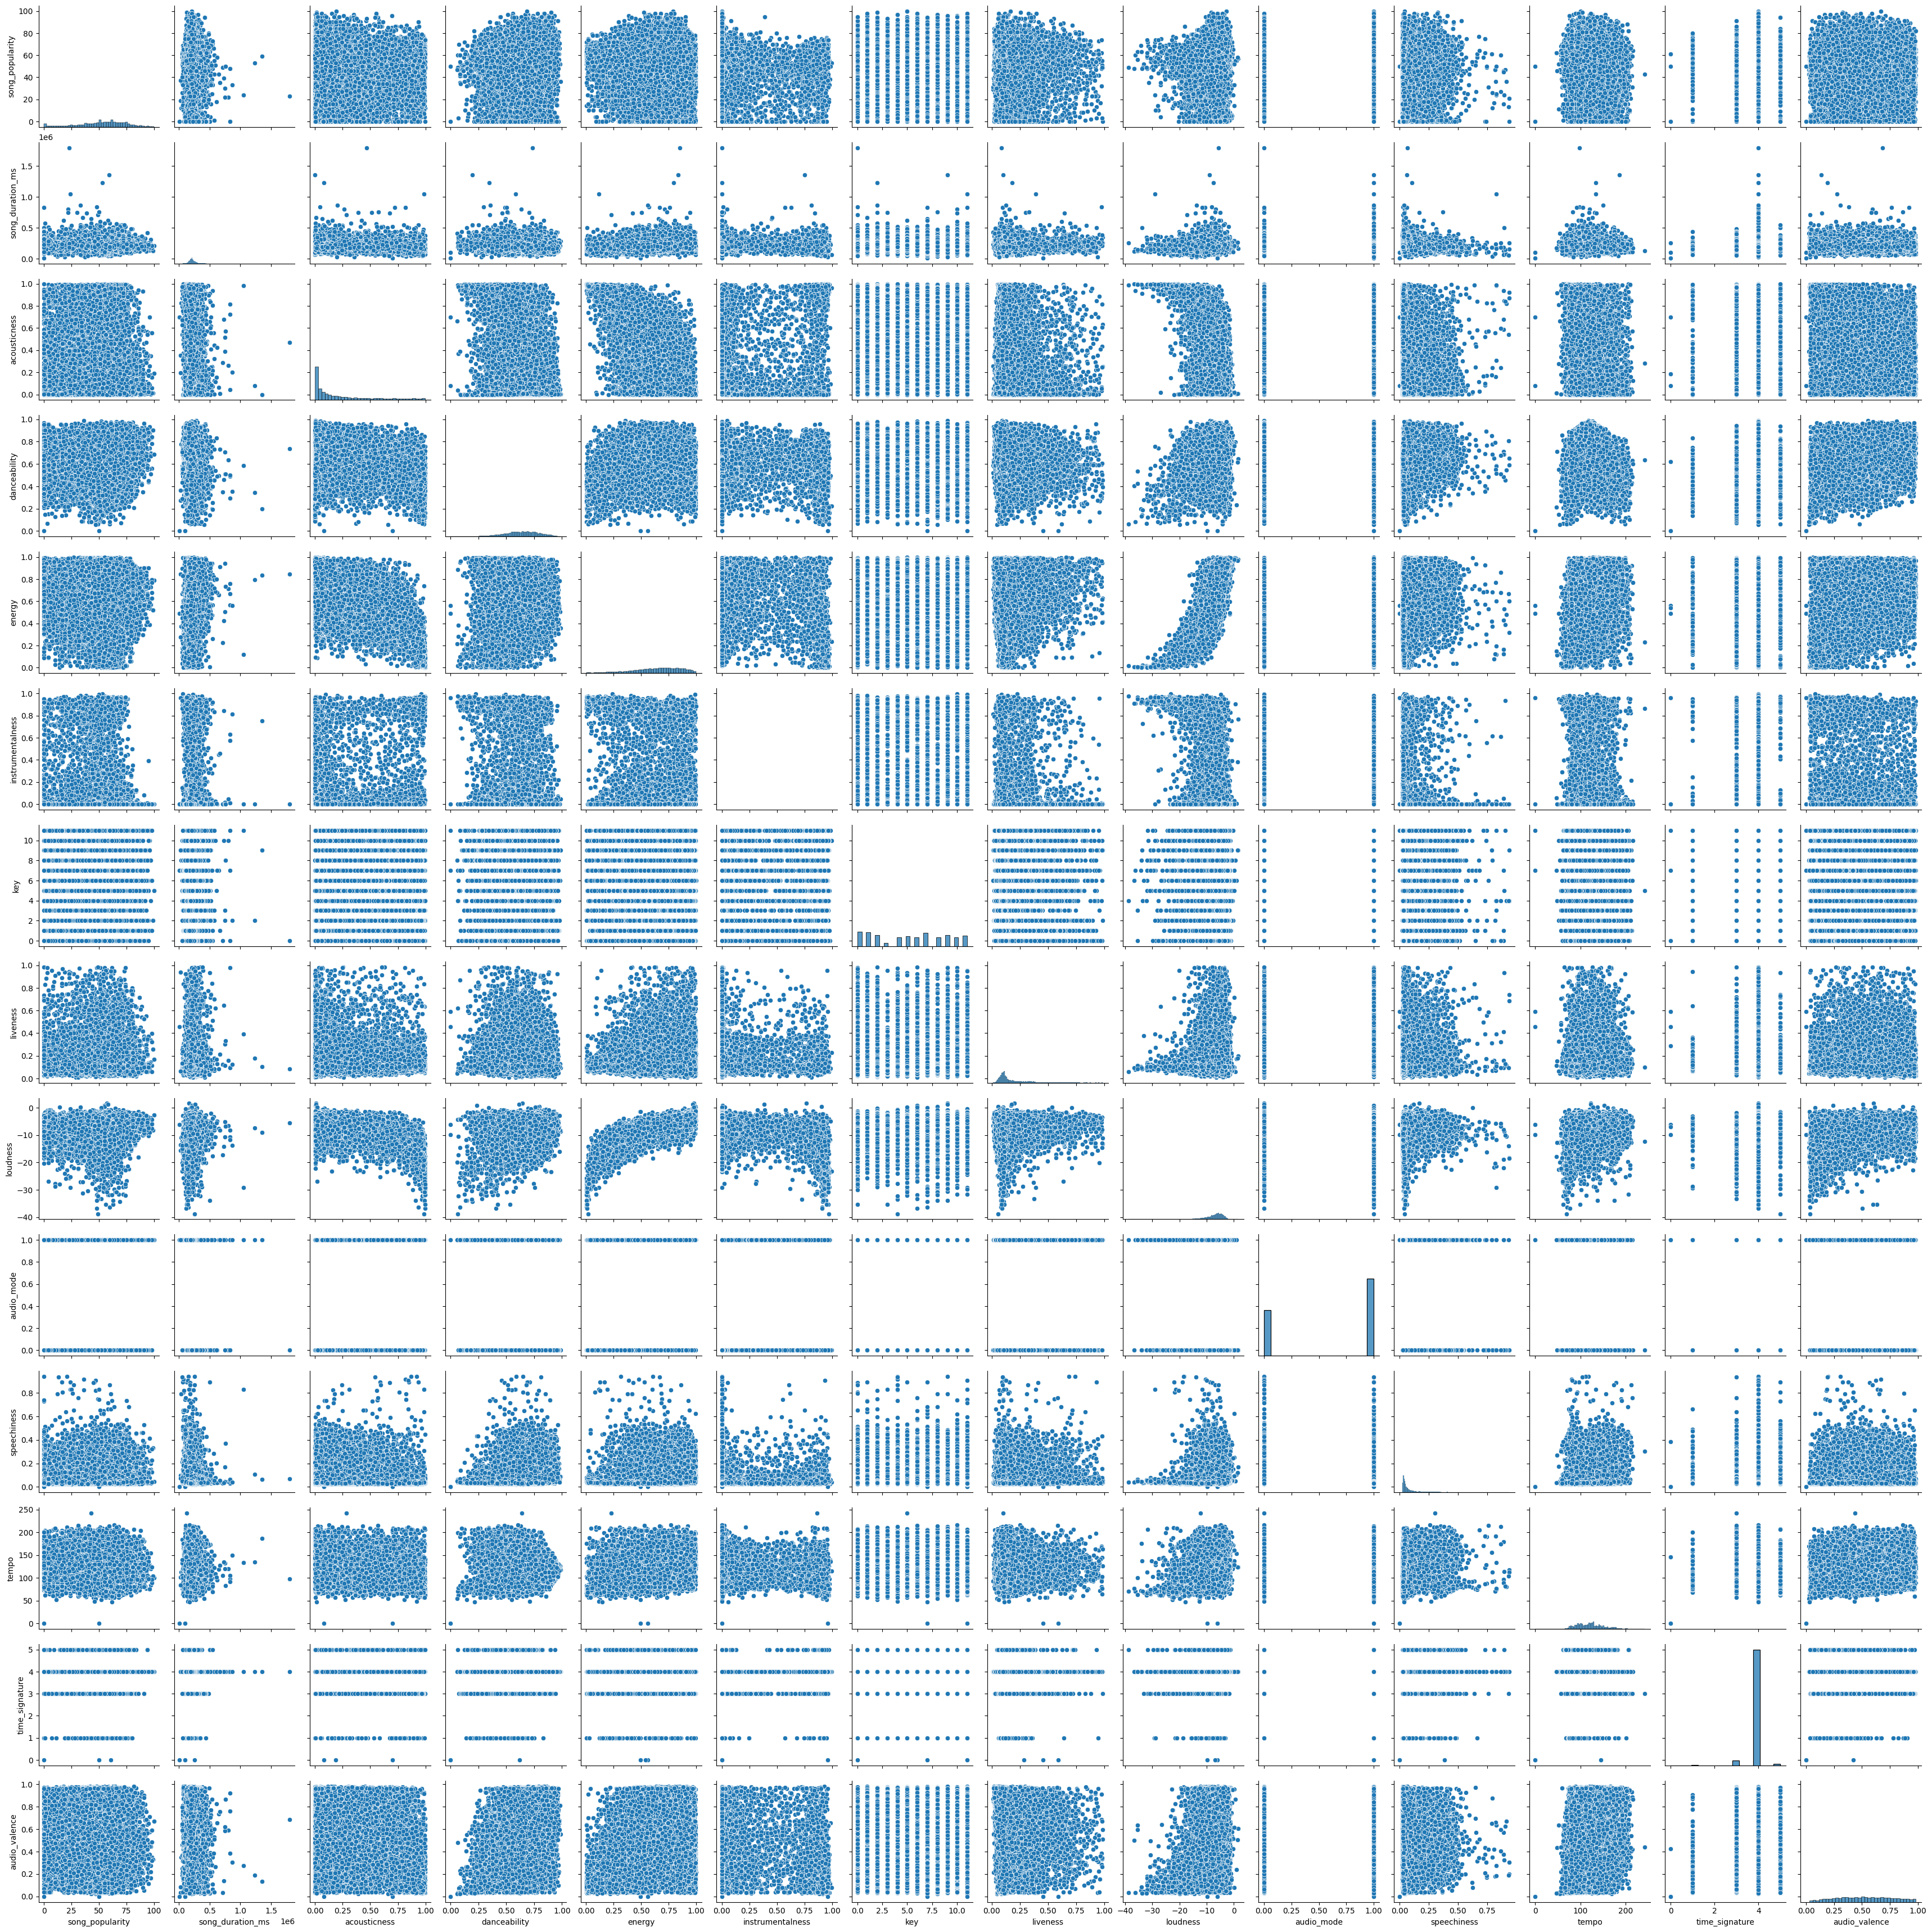

In [ ]:
plt.figure(figsize=(24,20))
sns.pairplot(X)
plt.show()

# **Data Manipulation**

In [ ]:
len(df["song_name"].unique())

13070

In [ ]:
df.shape

(18835, 15)

In [ ]:
df["song_name"].head(30)

0      Boulevard of Broken Dreams
1                      In The End
2               Seven Nation Army
3                      By The Way
4               How You Remind Me
5                Bring Me To Life
6                     Last Resort
7        Are You Gonna Be My Girl
8                  Mr. Brightside
9                     Sex on Fire
10                     The Middle
11                           Numb
12                Smooth Criminal
13                     Can't Stop
14                     Chop Suey!
15                    Take Me Out
16                     I Miss You
17                    Best of You
18     I Write Sins Not Tragedies
19                     Kryptonite
20             The Kill (Bury Me)
21                   Use Somebody
22                   No One Knows
23                    Jerk It Out
24                       Uprising
25              Hey There Delilah
26                         Blurry
27                 American Idiot
28    Welcome to the Black Parade
29            

In [7]:
df1=df.drop("song_name",axis=1).copy()

In [ ]:
df1.shape


(18835, 14)

In [8]:
X=df1.iloc[:,1:]
Y=df1.iloc[:,0]

In [ ]:
X.shape

(18835, 13)

In [ ]:
Y.shape

(18835,)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


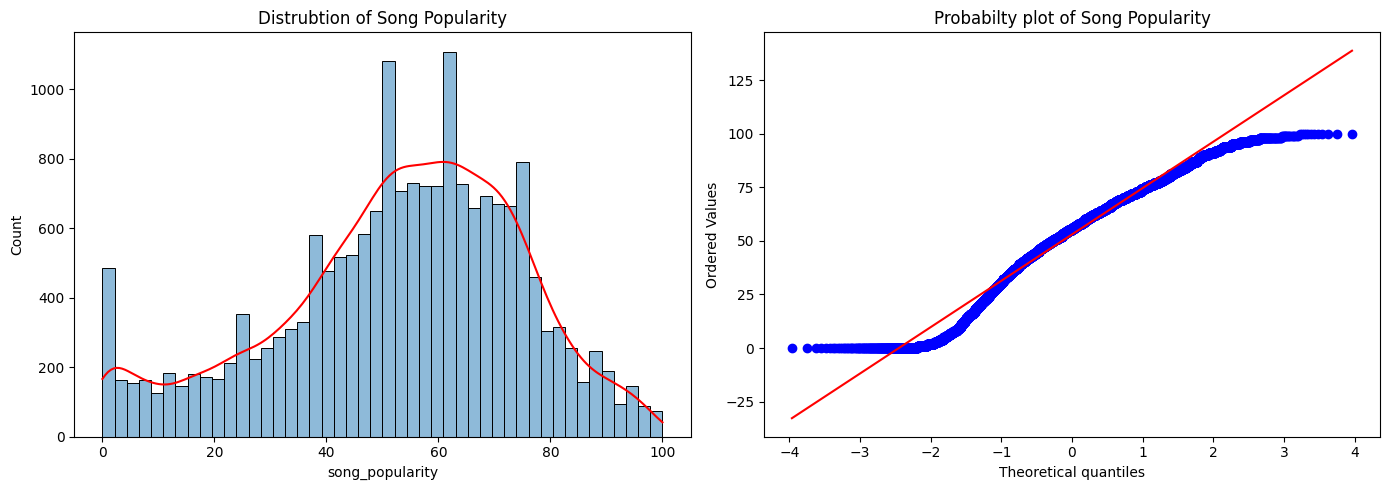

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax=sns.histplot(df1["song_popularity"],kde=True,)
ax.lines[0].set_color('red')
plt.title(f"Distrubtion of Song Popularity")
plt.subplot(1,2,2)
stats.probplot(df1["song_popularity"],dist="norm",plot=plt)
plt.title(f"Probabilty plot of Song Popularity")
plt.tight_layout()
plt.show()

In [ ]:
df["song_popularity"].skew(axis=0)

-0.501487468097605

In [ ]:
def find_outliers(df1, feature, iqr_multiplier=1.5):


  Q1 = df1[feature].quantile(0.25)
  Q3 = df1[feature].quantile(0.75)
  IQR = Q3 - Q1

  lower_limit = Q1 - iqr_multiplier * IQR
  upper_limit = Q3 + iqr_multiplier * IQR

  outliers = df1[(df1[feature] < lower_limit) | (df1[feature] > upper_limit)][feature]

  return outliers

def find_outliers_and_plot(df1):


    numeric_features = df1.select_dtypes(include=["number"]).columns

    for feature in numeric_features:
        outliers = find_outliers(df1, feature)

        # Create boxplot with annotations for outlier counts
        sns.boxplot(
            data=df1,
            x=feature,
            showmeans=True,  # Display mean markers
            orient="h"  # Horizontal boxplots for better readability
        )
        plt.annotate(
            f"Outliers: {len(outliers)}",
            xy=(1, 0.95),  # Adjust position as needed for visual clarity
            fontsize=12,
            xycoords="axes fraction",
            horizontalalignment="right",
        )
        plt.title(f"{feature}")
        plt.show()


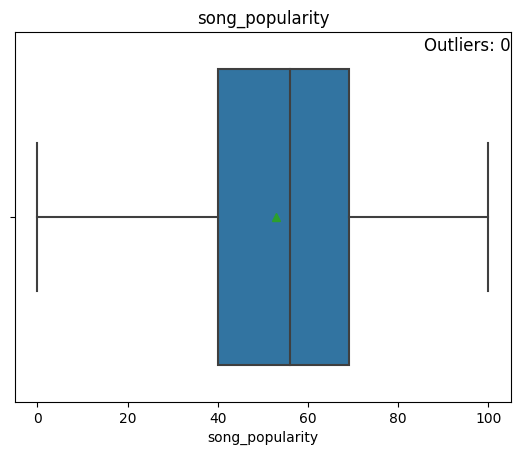

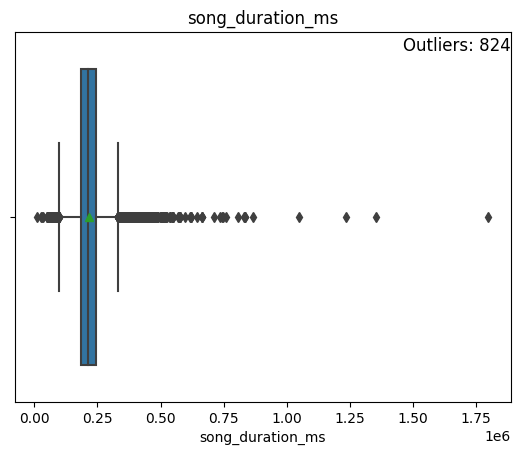

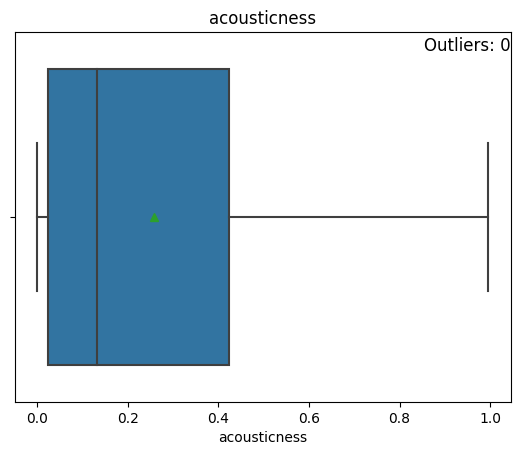

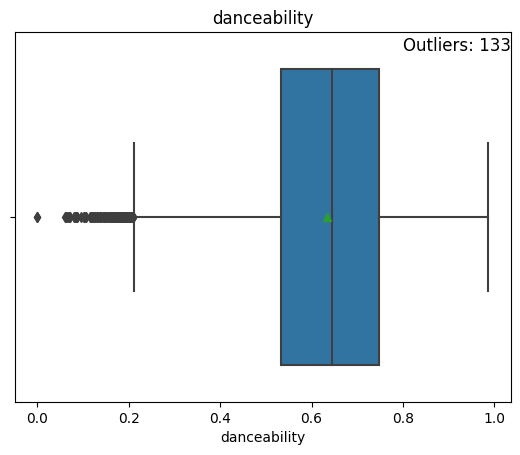

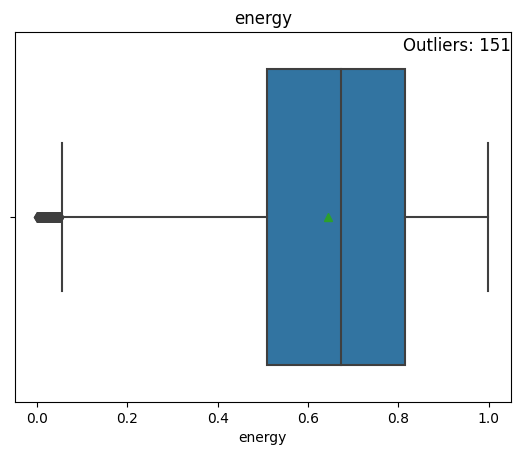

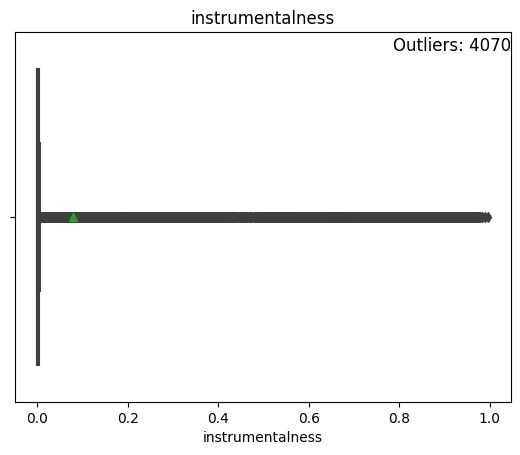

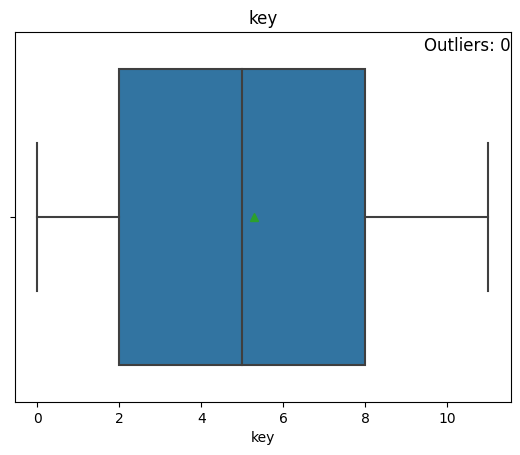

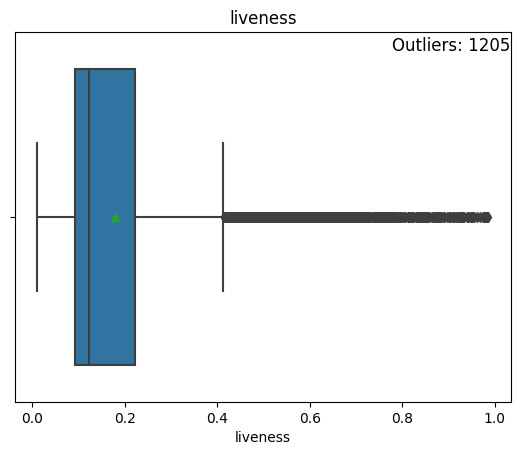

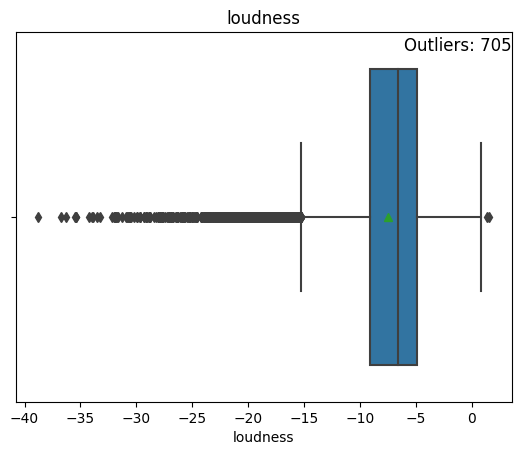

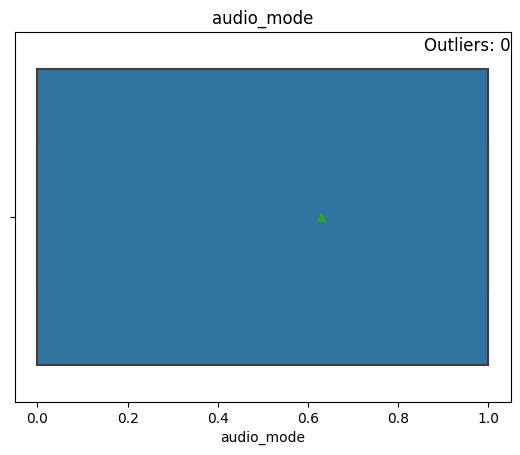

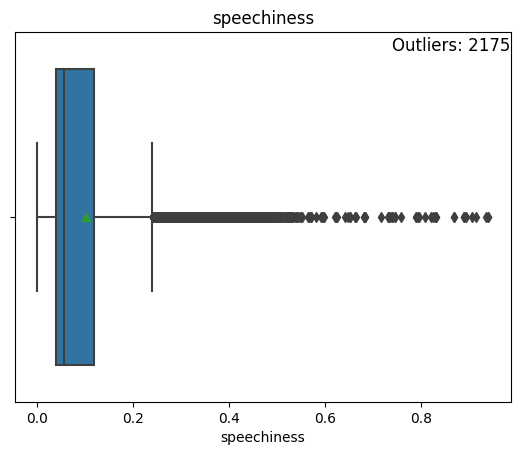

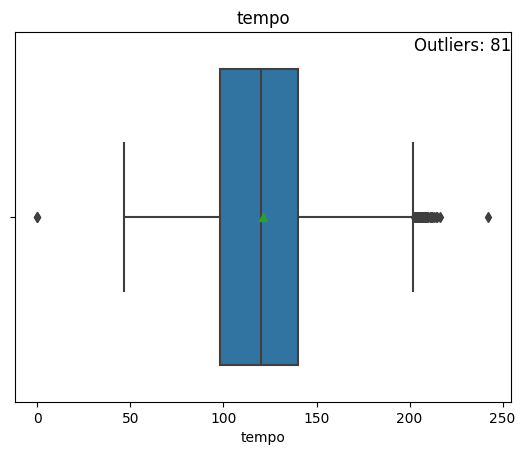

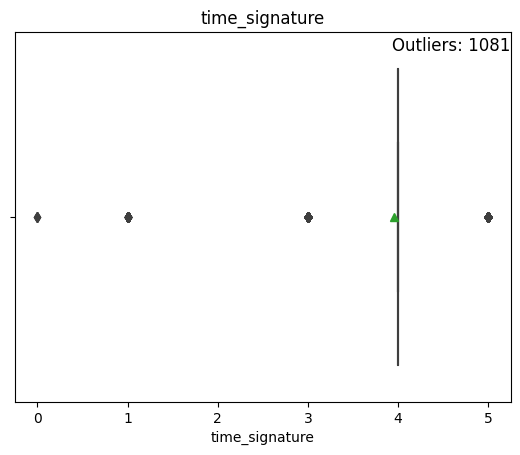

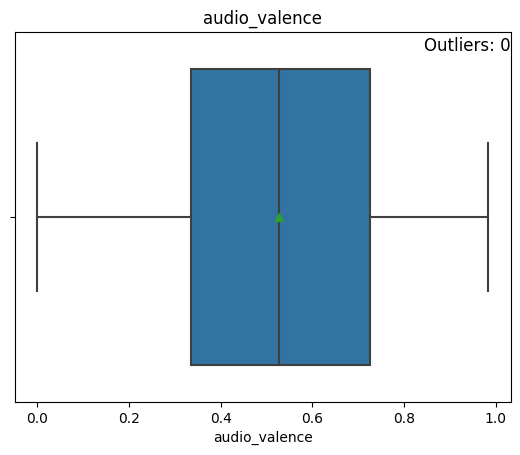

In [ ]:
find_outliers_and_plot(df1)

In [ ]:
def count_outliers(data):
  print("Number of outliers:")
  for col in data.columns:
    print(f"{col}:{len(find_outliers(data,col))}")

In [ ]:
count_outliers(df1)

Number of outliers:
song_popularity:0
song_duration_ms:824
acousticness:0
danceability:133
energy:151
instrumentalness:4070
key:0
liveness:1205
loudness:705
audio_mode:0
speechiness:2175
tempo:81
time_signature:1081
audio_valence:0


# Scaling the features

In [9]:
X_new=df1.iloc[:,1:]   #all rows,strat from 1th column to the last
Y_new=df1.iloc[:,0]    # all rows only 0th columndf2_cap

In [ ]:
Y_new.head()

0    73
1    66
2    76
3    74
4    56
Name: song_popularity, dtype: int64

In [10]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)  # Fit and transform features

# Convert X_scaled back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

correlation = X_scaled_df.corrwith(Y_new)  # Calculate correlation coefficients
print("Correlation between features and target:")
print(correlation)

strong_correlations = correlation[correlation.abs() > 0.5]  # Filter correlations above 0.5 (absolute value)
print("\nFeatures with strong correlations (|correlation| > 0.5):")
print(strong_correlations)


Correlation between features and target:
song_duration_ms   -0.018899
acousticness       -0.065181
danceability        0.104290
energy              0.001365
instrumentalness   -0.130907
key                -0.013160
liveness           -0.038937
loudness            0.099442
audio_mode         -0.004969
speechiness         0.021479
tempo              -0.022672
time_signature      0.034983
audio_valence      -0.052895
dtype: float64

Features with strong correlations (|correlation| > 0.5):
Series([], dtype: float64)


# Creating Features

In [11]:
df2=df1.copy()

In [12]:
bin_edges = [0, 0.5, 0.75, 1]
bin_labels = ['L', 'M', 'H']

# Create new categorical feature based on numerical binning
df2['energy_category'] = pd.cut(df['energy'], bins=bin_edges, labels=bin_labels, right=False)
df2['danceability_category'] = pd.cut(df['danceability'], bins=bin_edges, labels=bin_labels, right=False)

bin_labels = ['LP', 'MP', 'HP']
df2['valence_category'] = pd.cut(df['audio_valence'], bins=bin_edges, labels=bin_labels, right=False)


In [ ]:
df2.shape

(18835, 17)

In [ ]:
df2.head(6)

song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   
5               80            235893      0.008950         0.316   0.945   

   instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0          0.000029    8    0.0589    -4.095           1       0.0294   
1          0.000000    3    0.1080    -6.407           0       0.0498   
2          0.447000    0    0.2550    -7.828           1       0.0792   
3          0.003550    0    0.1020    -4.938           1       0.1070   
4          0.000000   10    0.1130    -5.065           1       0.0313   
5          0.000002    4    0.3960    -3.169           0       0.1240   

     tempo  time_signature  audio_valence energy_category  \
0  167.060               4          0.474               M   
1  105.256               4          0.370               H   
2  123.881               4          0.324               L   
3  122.444               4          0.198               H   
4  172.011               4          0.574               H   
5  189.931               4          0.320               H   

  danceability_category valence_category  
0                     L               LP  
1                     M               LP  
2                     M               LP  
3                     L               LP  
4                     L               MP  
5                     L               LP

In [ ]:
df2["audio_valence"].describe()

count    18835.000000
mean         0.527967
std          0.244632
min          0.000000
25%          0.335000
50%          0.527000
75%          0.725000
max          0.984000
Name: audio_valence, dtype: float64

In [13]:
category_features = set(df2.columns) - set(df1.columns)
len(category_features)

3

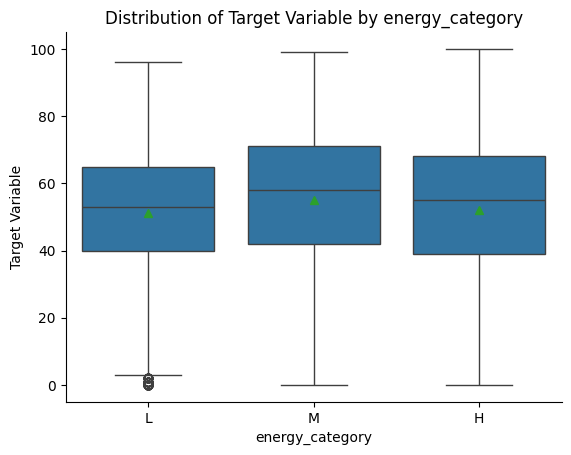

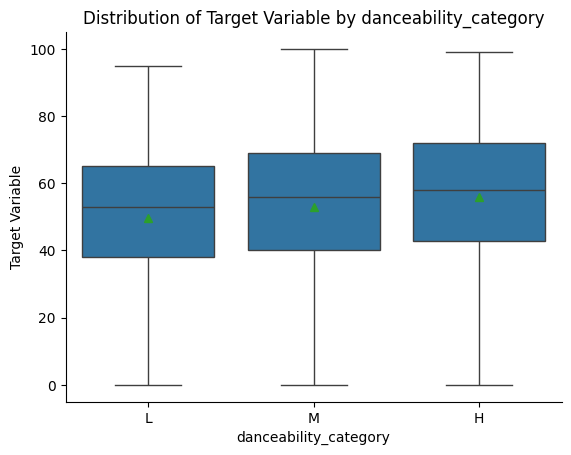

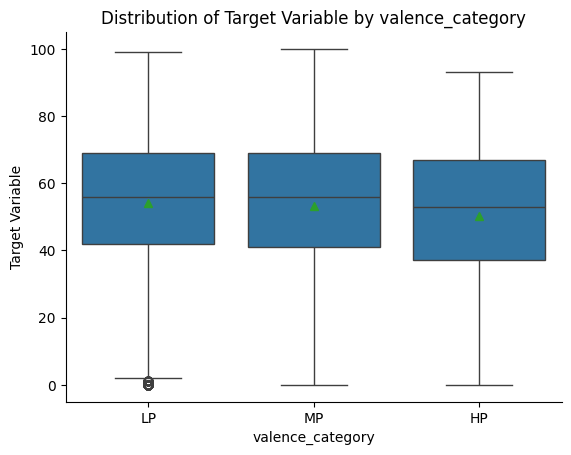

In [14]:
for col in category_features:


  sns.boxplot(x = col,y = 'song_popularity',showmeans=True,data=df2)


  sns.despine()  # Remove extra spines from the plot
  plt.xlabel(col)
  plt.ylabel('Target Variable')
  plt.title('Distribution of Target Variable by ' + col)
  plt.show()


In [15]:
categorical_columns = ['energy_category', 'valence_category', 'danceability_category']

# Initializing OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform ordinal encoder on categorical columns
df2[categorical_columns] = ordinal_encoder.fit_transform(df2[categorical_columns])

In [ ]:
df2.shape

(18835, 17)

In [ ]:
df2.head(10)

song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   
5               80            235893      0.008950         0.316   0.945   
6               81            199893      0.000504         0.581   0.887   
7               76            213800      0.001480         0.613   0.953   
8               80            222586      0.001080         0.330   0.936   
9               81            203346      0.001720         0.542   0.905   

   instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0          0.000029    8    0.0589    -4.095           1       0.0294   
1          0.000000    3    0.1080    -6.407           0       0.0498   
2          0.447000    0    0.2550    -7.828           1       0.0792   
3          0.003550    0    0.1020    -4.938           1       0.1070   
4          0.000000   10    0.1130    -5.065           1       0.0313   
5          0.000002    4    0.3960    -3.169           0       0.1240   
6          0.001110    4    0.2680    -3.659           0       0.0624   
7          0.000582    2    0.1520    -3.435           1       0.0855   
8          0.000000    1    0.0926    -3.660           1       0.0917   
9          0.010400    9    0.1360    -5.653           1       0.0540   

     tempo  time_signature  audio_valence  energy_category  \
0  167.060               4          0.474              2.0   
1  105.256               4          0.370              0.0   
2  123.881               4          0.324              1.0   
3  122.444               4          0.198              0.0   
4  172.011               4          0.574              0.0   
5  189.931               4          0.320              0.0   
6   90.578               4          0.724              0.0   
7  105.046               4          0.537              0.0   
8  148.112               4          0.234              0.0   
9  153.398               4          0.374              0.0   

   danceability_category  valence_category  
0                    1.0               1.0  
1                    2.0               1.0  
2                    2.0               1.0  
3                    1.0               1.0  
4                    1.0               2.0  
5                    1.0               1.0  
6                    2.0               2.0  
7                    2.0               2.0  
8                    1.0               1.0  
9                    2.0               1.0

# Selectig K best features


In [16]:
X_new=df2.iloc[:,1:]   #all rows,strat from 1th column to the last
Y_new=df2.iloc[:,0]    # all rows only 0th column

In [17]:
def select_best_k_features(df,k):
  new_features=SelectKBest(f_regression,k=k).fit_transform(X_new,Y_new)
  select_features=X_new.columns[SelectKBest(f_regression,k=k).fit(X_new,Y_new).get_support()]
  return select_features

In [18]:
selected_features=select_best_k_features(df2,10)

In [ ]:
print(selected_features)

Index(['acousticness', 'danceability', 'instrumentalness', 'liveness',
       'loudness', 'time_signature', 'audio_valence', 'energy_category',
       'danceability_category', 'valence_category'],
      dtype='object')


**Distribution plot between the true and predicted values**

In [19]:
def  plot_dis(y,yhat):

    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Atctual vs Fitted Values')
    plt.xlabel('True values')
    plt.ylabel('Predicted value')

    plt.show()
    plt.close()

***R2 score on each feature with target variable****

In [ ]:
def get_R2_features(model,test=True):
    #X: global
    features=list(X)


    R_2_train=[]
    R_2_test=[]

    for feature in features:
        model.fit(x_train[[feature]],y_train)

        R_2_test.append(model.score(x_test[[feature]],y_test))
        R_2_train.append(model.score(x_train[[feature]],y_train))

    plt.bar(features,R_2_train,label="Train")
    plt.bar(features,R_2_test,label="Test")
    plt.xticks(rotation=90)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()
    print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
    print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X_new,Y_new,test_size=0.2)

**Baseline model**


In [21]:
shuffle_split_cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)

In [59]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

# Define scoring dictionary including MSE, R2 score, and RMSE
scoring = {'mse': 'neg_mean_squared_error',
           'r2': 'r2',
           'rmse': make_scorer(rmse, greater_is_better=False)}

def dummy_regressor_baseline(strategy,constant_val=None,quantile_val=None):
    baseline_model_median=DummyRegressor(strategy=strategy,constant=constant_val,quantile=quantile_val)
    baseline_cv_results=cross_validate(baseline_model_median,x_train,y_train,cv=shuffle_split_cv,scoring=scoring,n_jobs=2)
    mse_scores = -baseline_cv_results["test_mse"]
    r2_scores = baseline_cv_results["test_r2"]
    rmse_scores = -baseline_cv_results["test_rmse"]
    scores_df = pd.DataFrame({'MSE': mse_scores, 'R2': r2_scores, 'RMSE': rmse_scores})

    return scores_df

In [78]:
baseline_median_cv_results_errors=dummy_regressor_baseline(strategy='median')
baseline_mean_cv_results_errors=dummy_regressor_baseline(strategy='mean')
baseline_constant_cv_results_errors=dummy_regressor_baseline(strategy='constant',constant_val=2)



In [80]:
all_baseline_results = pd.concat([baseline_median_cv_results_errors,
                                  baseline_mean_cv_results_errors,
                                  baseline_constant_cv_results_errors],
                                 keys=['Median', 'Mean', 'Constant (2)'],
                                 axis=1)

In [154]:
all_baseline_results.head()

Median                             Mean                       \
          MSE        R2       RMSE         MSE        R2       RMSE   
0  467.777704 -0.002323  21.628169  468.123648 -0.003064  21.636165   
1  463.911082 -0.003420  21.538595  463.186189 -0.001852  21.521761   
2  471.836098 -0.006221  21.721789  469.049891 -0.000280  21.657560   
3  502.423689 -0.004204  22.414810  500.788935 -0.000936  22.378314   
4  477.631719 -0.006939  21.854787  474.393037 -0.000111  21.780566   

  Constant (2)                       
           MSE        R2       RMSE  
0  3166.416722 -5.784785  56.270923  
1  3139.619774 -5.790865  56.032310  
2  3099.785003 -5.610495  55.675713  
3  3157.699071 -5.311352  56.193408  
4  3094.326476 -5.523430  55.626671

In [101]:
strategies =['Median','Mean','Constant (2)']

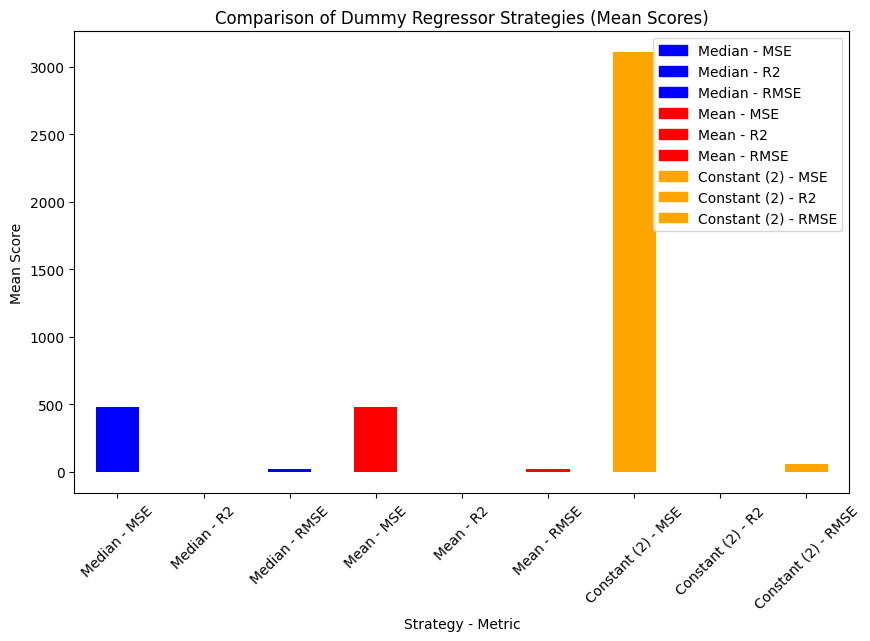

In [120]:
import matplotlib.pyplot as plt

def visualize_mean_scores(scores_df):
    """
    This function creates a bar chart visualizing the mean scores for each strategy
    (considering MultiIndex columns in the DataFrame).
    """
    # Calculate mean scores for each strategy (across metrics)
    mean_scores = scores_df.mean(axis=0)  # Calculate mean across rows (strategies)

    # Flatten the MultiIndex into a single index
    mean_scores.index = [f"{strategy} - {metric}" for strategy, metric in mean_scores.index]

    # Define colors for each strategy
    strategy_colors = {'Median - MSE': 'blue', 'Median - R2': 'blue', 'Median - RMSE': 'blue',
                       'Mean - MSE': 'red', 'Mean - R2': 'red', 'Mean - RMSE': 'red',
                       'Constant (2) - MSE': 'orange', 'Constant (2) - R2': 'orange', 'Constant (2) - RMSE': 'orange'}

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    mean_scores.plot(kind='bar', color=[strategy_colors[strategy] for strategy in mean_scores.index])
    plt.title('Comparison of Dummy Regressor Strategies (Mean Scores)')
    plt.xlabel('Strategy - Metric')
    plt.ylabel('Mean Score')
    plt.xticks(rotation=45)

    # Add legend indicating colors for each strategy
    handles = [plt.Rectangle((0,0),1,1, color=strategy_colors[strategy]) for strategy in mean_scores.index]
    plt.legend(handles, mean_scores.index, loc='upper right')

    plt.show()

# Assuming scores_df is your DataFrame
visualize_mean_scores(all_baseline_results.copy())  # Avoid modifying the original DataFrame


In [82]:
all_baseline_results.head()

Median                             Mean                       \
          MSE        R2       RMSE         MSE        R2       RMSE   
0  467.777704 -0.002323  21.628169  468.123648 -0.003064  21.636165   
1  463.911082 -0.003420  21.538595  463.186189 -0.001852  21.521761   
2  471.836098 -0.006221  21.721789  469.049891 -0.000280  21.657560   
3  502.423689 -0.004204  22.414810  500.788935 -0.000936  22.378314   
4  477.631719 -0.006939  21.854787  474.393037 -0.000111  21.780566   

  Constant (2)                       
           MSE        R2       RMSE  
0  3166.416722 -5.784785  56.270923  
1  3139.619774 -5.790865  56.032310  
2  3099.785003 -5.610495  55.675713  
3  3157.699071 -5.311352  56.193408  
4  3094.326476 -5.523430  55.626671

Based on the above visulization  we witnessed that median is performaing better so choosing median

In [156]:
baseline_model = DummyRegressor(strategy='median', constant=None, quantile=None)

    # Fit the model on the training data
baseline_model.fit(x_train, y_train)

    # Predict on the test data
y_pred_baseline = baseline_model.predict(x_test)

# RandomForestModel


In [28]:
rfmodel=RandomForestRegressor()

**Hyperparamters for RandomforestRegressor model**

In [29]:
#Number of tress in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1000,num=12)]
# Number of features to consider at every split
max_features=['auto','sqrt']
#max number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#minimum number of samples required to split a node
min_samples_split=[2,5,10,15,1000]
# minimum number of samples required ar each leaf node
min_samples_leaf=[1,2,5,10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [30]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap':bootstrap
}
print(random_grid)

{'n_estimators': [100, 181, 263, 345, 427, 509, 590, 672, 754, 836, 918, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 1000], 'min_samples_leaf': [1, 2, 5, 10], 'bootstrap': [True, False]}


In [31]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
rf_model = RandomizedSearchCV(estimator = rfmodel, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=False, random_state=42,scoring='neg_mean_squared_error', n_jobs = -1)
rf_model

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              1000],
                                        'n_estimators': [100, 181, 263, 345,
                                                         427, 509, 590, 672,
                                                         754, 836, 918, 1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=False)

In [32]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
with tqdm(total=len(random_grid['n_estimators']) * len(random_grid['max_features'])) as pbar:
    rf_model.fit(x_train, y_train)
    pbar.update(1)


  0%|          | 0/24 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
  4%|▍         | 1/24 [3:41:14<84:48:35, 13274.57s/it]


In [33]:
#Best Paramters
rf_model.best_params_

{'n_estimators': 754,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25,
 'bootstrap': False}

In [125]:
best_rf_regressor = rf_model.best_estimator_

In [157]:
y_pred_rf=best_rf_regressor.predict(x_test)

<ipython-input-19-dd8d3cdd329e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
<ipython-input-19-dd8d3cdd329e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


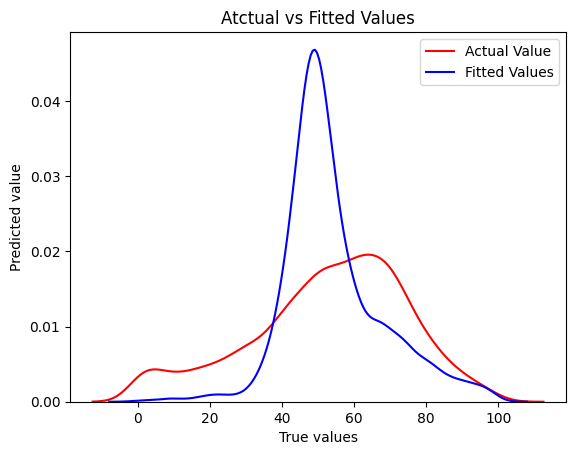

In [127]:

plot_dis(y_test,y_pred_rf)

In [150]:

print("MAE: ",mean_absolute_error(y_test,y_pred_rf))
print("MSE: ",mean_squared_error(y_test,y_pred_rf))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print("R2: ",r2_score(y_test, y_pred_rf))

MAE:  11.384691945182254
MSE:  276.62723324456806
RMSE:  16.63211451513511
R2:  0.4144008471366918


## Decesion Tree Regressor 2nd model

In [158]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Initialize Grid Search Cross Validation
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Get the best model
best_dt_regressor = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_dt = best_dt_regressor.predict(x_test)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [152]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2: ",r2_score(y_test, y_pred))

MAE 16.43982100058296
MSE 446.61141691547215
RMSE 21.133182839209812
R2:  0.054557050160144116


In [ ]:

def plot_dis_compare(y_true, y_baseline, y_random_forest, y_decision_tree):
    plt.figure(figsize=(10, 6))

    # Plotting actual vs fitted values for baseline, random forest, and decision tree models
    sns.distplot(y_true, hist=False, color="r", label="True Values")
    sns.distplot(y_baseline, hist=False, color="blue", label="Baseline Predictions",kde_kws={'bw': 0.5})
    sns.distplot(y_random_forest, hist=False, color="g", label="Random Forest Predictions", kde_kws={'bw': 0.5})
    sns.distplot(y_decision_tree, hist=False, color="m", label="Decision Tree Predictions", kde_kws={'bw': 0.5})

    plt.legend()
    plt.title('Distribution of True Values and Predictions from Baseline, Random Forest, and Decision Tree Models')
    plt.xlabel('Value')
    plt.ylabel('Density')

    plt.show()
    plt.close()


<ipython-input-176-d18de1e174ea>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_true, hist=False, color="r", label="True Values")
<ipython-input-176-d18de1e174ea>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_baseline, hist=False, color="blue", label="Baseline Predicti

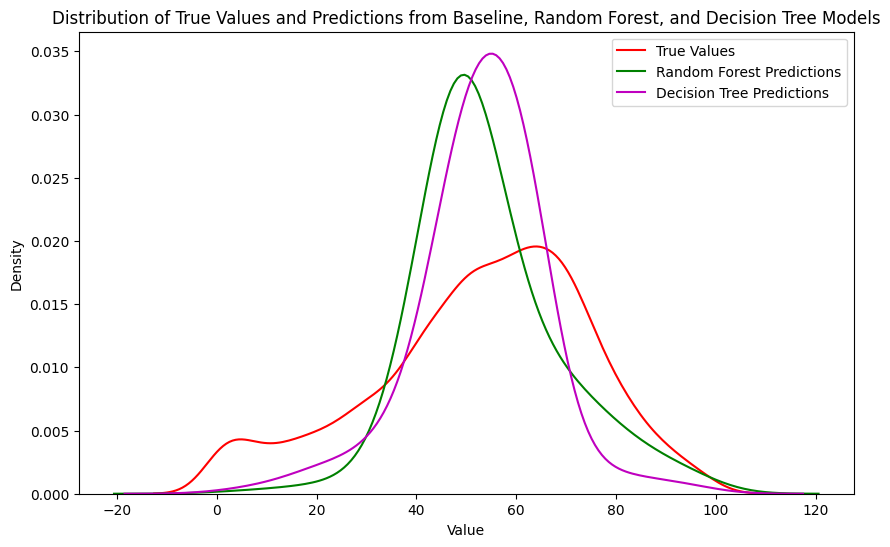

In [178]:
plot_dis_compare(y_test,y_pred_baseline,y_pred_rf,y_pred_dt)